In [12]:
#load in csv from: "C:\Users\Tristan\Dropbox\My PC (LAPTOP-Q4L5B51G)\Downloads\hilda2010_countries.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#load in csv from: "C:\Users\Tristan\Dropbox\My PC (LAPTOP-Q4L5B51G)\Downloads\hilda2010_countries.csv"
df = pd.read_csv("C:/Users/Tristan/Dropbox/My PC (LAPTOP-Q4L5B51G)/Downloads/hilda2010_countries.csv")

In [13]:
#add a new column called gridcode_name to df, which is the name of the gridcode values. 111 corresponds to "Settlement", 222 to "Cropland", 333 to "Forest", 444 to "Grassland", 555 "Other Land", and 666 to "Water"
df['Land Cover'] = df['gridcode'].map({111: "Settlement", 222: "Cropland", 333: "Forest", 444: "Grassland", 555: "Other Land", 666: "Water"})

In [14]:
#Print every unique instance of admin in df
print(df['admin'].unique())

['Hungary' 'Ireland' 'Romania' 'Latvia' 'Poland' 'Belgium' 'Slovenia'
 'Bulgaria' 'Malta' 'Greece' 'Slovakia' 'United Kingdom' 'Lithuania'
 'Denmark' 'Finland' 'Czech Republic' 'Netherlands' 'Austria' 'Germany'
 'Italy' 'Sweden' 'Portugal' 'Spain' 'Estonia' 'Cyprus' 'France'
 'Luxembourg']


In [15]:
#Create a new column in df called countrygroup. Any row called Spain, Cyprus, Greece, Italy, Portugal, or Malta will be called "Southern Europe", any row called France, Belgium, Netherlands, Luxembourg, or Germany will be called "Central Europe", any row called Austria, Czech Republic, Hungary, Poland, Slovakia, or Slovenia will be called "Eastern Europe",  any row called Denmark, Estonia, Finland, Latvia, Lithuania, or Sweden will be called "Northern Europe", any row called Bulgaria, Croatia, Romania, or Turkey will be called "South-Eastern Europe", any row called Ireland or United Kingdom will be called "North-Western Europe", any row called Albania, Bosnia and Herzegovina, Kosovo, Montenegro, North Macedonia, or Serbia will be called "South-Eastern Europe", any row called Norway or Switzerland or Finland or Sweden or Denmark will be called "Northern Europe"
# Define the mapping dictionary for country groups
country_groups = {
    'Spain': 'Southern Europe',
    'Cyprus': 'Southern Europe',
    'Greece': 'Southern Europe',
    'Italy': 'Southern Europe',
    'Portugal': 'Southern Europe',
    'Malta': 'Southern Europe',
    'France': 'Central Europe',
    'Belgium': 'Central Europe',
    'Netherlands': 'Central Europe',
    'Luxembourg': 'Central Europe',
    'Germany': 'Central Europe',
    'Austria': 'Eastern Europe',
    'Czech Republic': 'Eastern Europe',
    'Hungary': 'Eastern Europe',
    'Poland': 'Eastern Europe',
    'Slovakia': 'Eastern Europe',
    'Slovenia': 'Eastern Europe',
    'Denmark': 'Northern Europe',
    'Estonia': 'Northern Europe',
    'Finland': 'Northern Europe',
    'Latvia': 'Northern Europe',
    'Lithuania': 'Northern Europe',
    'Sweden': 'Northern Europe',
    'Bulgaria': 'Eastern Europe',
    'Croatia': 'Eastern Europe',
    'Romania': 'Eastern Europe',
    'Ireland': 'North-Western Europe',
    'United Kingdom': 'North-Western Europe',
    'Albania': 'Eastern Europe',
    'Bosnia and Herzegovina': 'Eastern Europe',
    'Kosovo': 'Eastern Europe',
    'Montenegro': 'Eastern Europe',
    'North Macedonia': 'Eastern Europe',
    'Serbia': 'Eastern Europe',
    'Norway': 'Northern Europe',
    'Switzerland': 'Northern Europe'
}

# Create the "countrygroup" column based on the mapping dictionary
df['Region'] = df['admin'].map(country_groups)

#head of df
print(df.head())


   gridcode    admin    Shape_Leng    Shape_Area      g2009  Land Cover  \
0       111  Hungary  1.410248e+07  5.126410e+09  53.172649  Settlement   
1       111  Ireland  3.537428e+06  1.362148e+09  54.299164  Settlement   
2       111  Romania  4.642641e+07  1.501785e+10  59.246494  Settlement   
3       111   Latvia  2.430706e+06  9.321655e+08  61.438225  Settlement   
4       111   Poland  2.940938e+07  1.086949e+10  55.682995  Settlement   

                 Region  
0        Eastern Europe  
1  North-Western Europe  
2        Eastern Europe  
3       Northern Europe  
4        Eastern Europe  


In [16]:
#rename the g2009 column to NDVI and the admin column to country
df.rename(columns={'g2009': 'NDVI', 'admin': 'Country'}, inplace=True)

In [17]:
df

,gridcode,Country,Shape_Leng,Shape_Area,NDVI,Land Cover,Region
0,111,Hungary,1.410248e+07,5.126410e+09,53.172649,Settlement,Eastern Europe
1,111,Ireland,3.537428e+06,1.362148e+09,54.299164,Settlement,North-Western Europe
2,111,Romania,4.642641e+07,1.501785e+10,59.246494,Settlement,Eastern Europe
3,111,Latvia,2.430706e+06,9.321655e+08,61.438225,Settlement,Northern Europe
4,111,Poland,2.940938e+07,1.086949e+10,55.682995,Settlement,Eastern Europe
...,...,...,...,...,...,...,...
164,222,Greece,4.333503e+03,1.580392e+03,53.329487,Cropland,Southern Europe
165,444,Germany,1.246552e+03,2.674658e+01,62.275318,Grassland,Central Europe
166,444,France,1.246552e+03,2.674658e+01,62.275318,Grassland,Central Europe
167,444,France,2.913313e+03,6.251121e+01,71.236816,Grassland,Central Europe


In [18]:
#filter df to only those rows where Land Cover = "Forest" and call it df_forest
df_forest = df[df['Land Cover'] == "Forest"]

#filter df to only those rows where Land Cover = "Grassland" and call it df_grassland
df_grassland = df[df['Land Cover'] == "Grassland"]

#filter df to only those rows where Land Cover = "Cropland" and call it df_cropland
df_cropland = df[df['Land Cover'] == "Cropland"]

#filter df to only those rows where Land Cover = "Settlement" and call it df_settlement
df_settlement = df[df['Land Cover'] == "Settlement"]


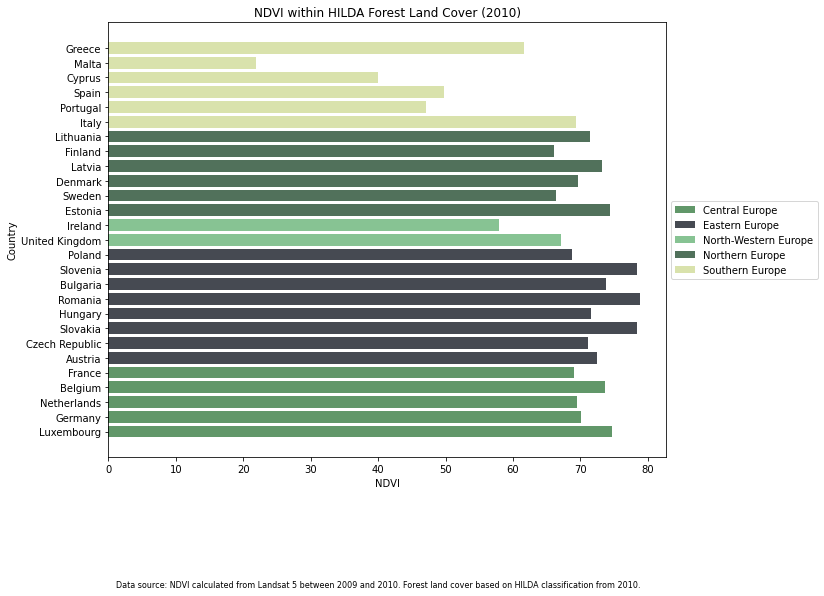

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the dataframe by Region column
df_forest_sorted = df_forest.sort_values('Region')

# Get unique regions and assign colors
regions = df_forest_sorted['Region'].unique()

# Define custom colors and alpha values for each region
colors = {
    'Central Europe': '#3A7D44',             # green
    'Eastern Europe': '#181D27',             # dark blue
    'Southern Europe': '#D0DB97',            # light yellow
    'Northern Europe': '#254D32',            # dark green
    'North-Western Europe': '#69B578'        # light green
}

# Set the white background for the plot
plt.rcParams['figure.facecolor'] = 'white'


# Set up the figure and axes with larger figsize
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the values as needed

# Create the bar chart
for i, region in enumerate(regions):
    region_data = df_forest_sorted[df_forest_sorted['Region'] == region]
    ax.barh(region_data['Country'], region_data['NDVI'], color=colors[region], alpha=.8, label=region)

# Set the labels and title
ax.set_xlabel('NDVI')
ax.set_ylabel('Country')
ax.set_title('NDVI within HILDA Forest Land Cover (2010)')

# Add a legend for the regions outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add a footnote
footnote = "Data source: NDVI calculated from Landsat 5 between 2009 and 2010. Forest land cover based on HILDA classification from 2010."
plt.figtext(0.5, -0.1, footnote, wrap=True, horizontalalignment='center', fontsize=8)

# Show the plot
plt.show()


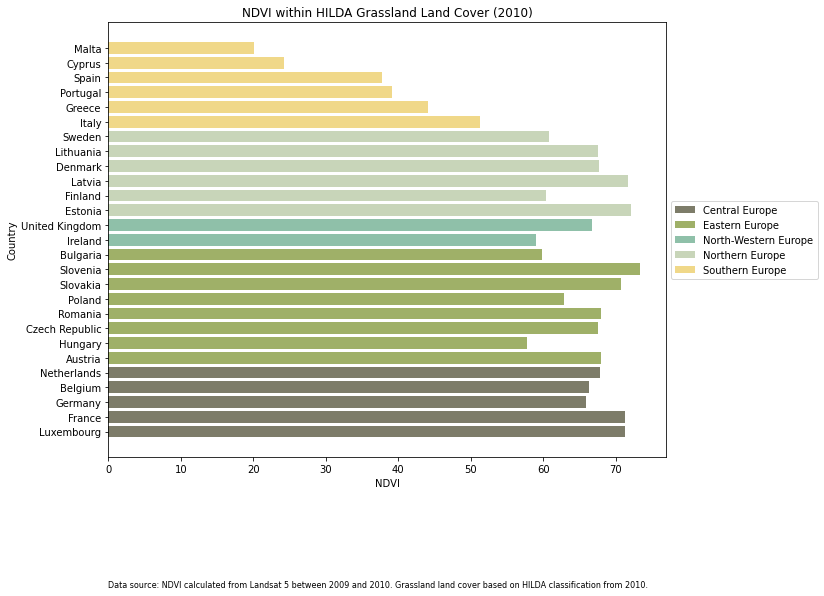

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the dataframe by Region column
df_grassland_sorted = df_grassland.sort_values('Region')

# Get unique regions and assign colors
regions = df_grassland_sorted['Region'].unique()

# Define custom colors and alpha values for each region
colors = {
    'Central Europe': '#7D7C69',             # 
    'Eastern Europe': '#9FB068',             # 
    'Southern Europe': '#F0D889',            # eggshell
    'Northern Europe': '#C8D5B9',            # 
    'North-Western Europe': '#8FC0A9'        # 
}

# Set the white background for the plot
plt.rcParams['figure.facecolor'] = 'white'


# Set up the figure and axes with larger figsize
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the values as needed

# Create the bar chart
for i, region in enumerate(regions):
    region_data = df_grassland_sorted[df_grassland_sorted['Region'] == region]
    ax.barh(region_data['Country'], region_data['NDVI'], color=colors[region], alpha=1, label=region)

# Set the labels and title
ax.set_xlabel('NDVI')
ax.set_ylabel('Country')
ax.set_title('NDVI within HILDA Grassland Land Cover (2010)')

# Add a legend for the regions outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add a footnote
footnote = "Data source: NDVI calculated from Landsat 5 between 2009 and 2010. Grassland land cover based on HILDA classification from 2010."
plt.figtext(0.5, -0.1, footnote, wrap=True, horizontalalignment='center', fontsize=8)

# Show the plot
plt.show()


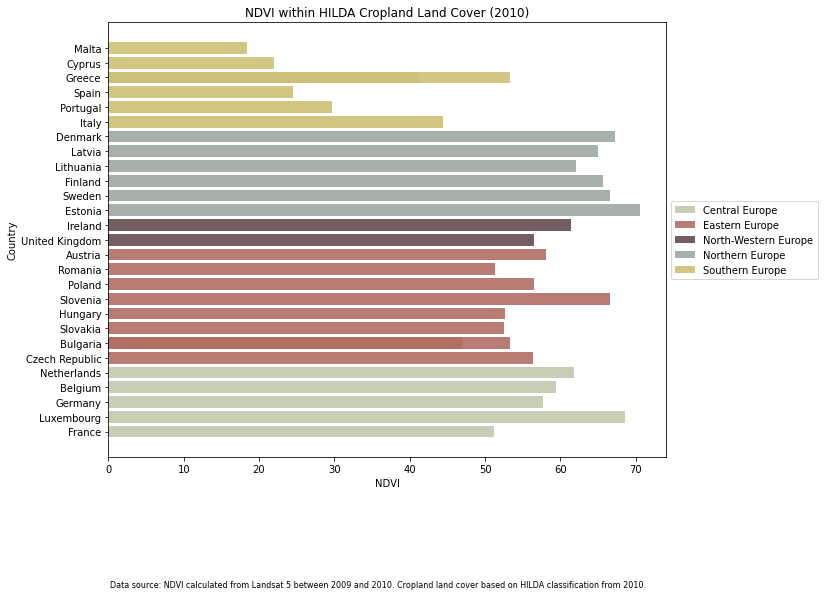

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the dataframe by Region column
df_cropland_sorted = df_cropland.sort_values('Region')

# Get unique regions and assign colors
regions = df_cropland_sorted['Region'].unique()

# Define custom colors and alpha values for each region
colors = {
    'Central Europe': '#C0CAAD',             # light green
    'Eastern Europe': '#B26E63',             # orange
    'Southern Europe': '#CEC075',            # dark yellow
    'Northern Europe': '#9DA9A0',            # dark green
    'North-Western Europe': '#654C4F'        # dark blue
}

# Set the white background for the plot
plt.rcParams['figure.facecolor'] = 'white'


# Set up the figure and axes with larger figsize
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the values as needed

# Create the bar chart
for i, region in enumerate(regions):
    region_data = df_cropland_sorted[df_cropland_sorted['Region'] == region]
    ax.barh(region_data['Country'], region_data['NDVI'], color=colors[region], alpha=0.9, label=region)

# Set the labels and title
ax.set_xlabel('NDVI')
ax.set_ylabel('Country')
ax.set_title('NDVI within HILDA Cropland Land Cover (2010)')

# Add a legend for the regions outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add a footnote
footnote = "Data source: NDVI calculated from Landsat 5 between 2009 and 2010. Cropland land cover based on HILDA classification from 2010."
plt.figtext(0.5, -0.1, footnote, wrap=True, horizontalalignment='center', fontsize=8)

# Show the plot
plt.show()
